# Neural Prophet

Here we will forecast the future of inflation using Neural Prophet.

### 1. Installing Neural Prophet

In [15]:
!pip install neuralprophet

### 2. Preparing the datasets & Importing neccessary libraries

In [16]:
!git clone https://github.com/farelarden/Dicoding-Capstone-ML.git

fatal: destination path 'Dicoding-Capstone-ML' already exists and is not an empty directory.


In [17]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [18]:
df_Makanan = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 02 - Makanan.csv')
df_Minuman = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 02 - Minuman.csv')
df_Rumah = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 03 - Rumah.csv')
df_Sandang = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 04 - Sandang.csv')
df_Transportasi = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 07 - Transportasi.csv')

### 3. Preparing the dataset

In [19]:
df_Makanan = df_Makanan[['KOTA MEULABOH','BULAN']]
df_Makanan.columns = ['y', 'ds']

In [28]:
df_Makanan.head()

,y,ds
0,1.10,2014-01-01
1,0.88,2014-02-01
2,1.42,2014-03-01
3,0.17,2014-04-01
4,-0.01,2014-05-01


### 4. Train the data

In [20]:
m = NeuralProphet()

In [24]:
model = m.fit(df_Makanan, freq='M', epochs=1000)

WARNING - (NP.forecaster.fit) - Model has already been fitted. Re-fitting will produce different results.
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:19<00:00, 52.46it/s, SmoothL1Loss=0.0174, MAE=0.586, MSE=0.734, RegLoss=0]


### 5. Forecasting

In [25]:
future = m.make_future_dataframe(df_Makanan, periods=900)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly
0,2021-10-31,None,-0.041092,NaN,0.009377,-0.050468
1,2021-11-30,None,0.031457,NaN,-0.019133,0.050590
2,2021-12-31,None,0.943865,NaN,-0.048593,0.992458
3,2022-01-31,None,-0.451035,NaN,-0.078053,-0.372982
4,2022-02-28,None,-0.069315,NaN,-0.104662,0.035347


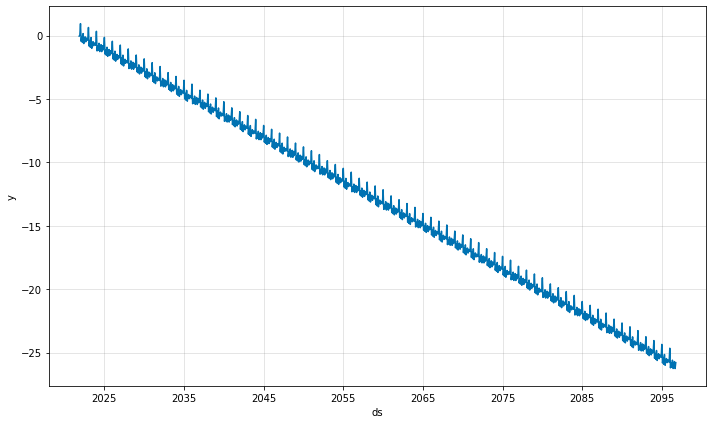

In [26]:
plot1 = m.plot(forecast)

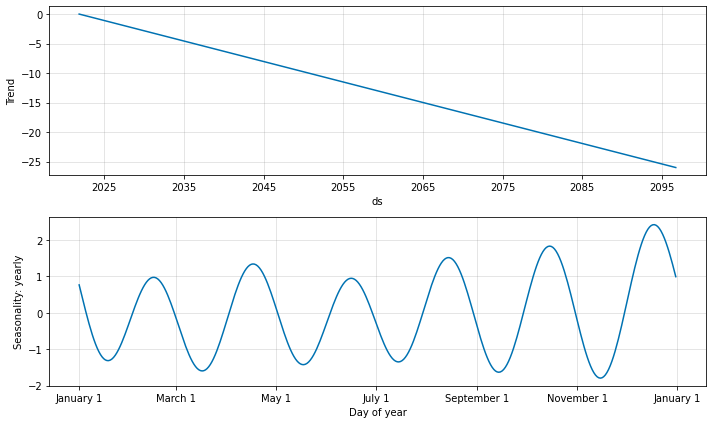

In [27]:
plt2 = m.plot_components(forecast)

In [33]:
forecast_value = forecast.loc[forecast.ds == '2021-10-31',['yhat1']].values[0]

In [34]:
forecast_value

array([-0.04109192])